## Signal Processing
The plots created in the last section show a strong annual harmonic component. Lets, identify this components, subtract them from the signal and the re-plot to see if there is any transannual trend.

> What if the annual change is not harmonic but another function? for example is could be piecewise (for rain/snow) or polynomial/logarithmical?. Use BLUE to get proper fit. (next section)



In [2]:
import pandas as pd
import numpy as np
from funciones import*
import matplotlib.pyplot as plt

Data=pd.read_csv("../../data/Time_series_DATA.txt",skiprows=149,index_col=0)
Data=Data.drop(columns=['Predicted ice thickness [m]','Noisy predicted ice thickness [m]','Days since start of year','Days until break up','Noisy predicted ice thickness [m]'])
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")






> We could *introduce*  a **lot more** of signal processing concepts such as:  welch periodogram, filters, windows, spectrogram,etc  and make a bunch of plot comparing them.

:::{card} Exercise 1
Compute and plot the Power Spectrum Density of each column. ¿ Do all the variable experience the same seasonal behaviour? Is there any multiyear harmonic?
```{admonition} Tips/Help
:class: tip, dropdown
Consider using the function `scipy.signal.welch` to compute the periodogram, alternatively, use `compute_and_plot_psd`from the ice_mude package,

Plot the PSD considering the frequency and period as x-axis
```

- We can see peaks at 
    - 120 days
    - 180 days 
    - 360 days
:::


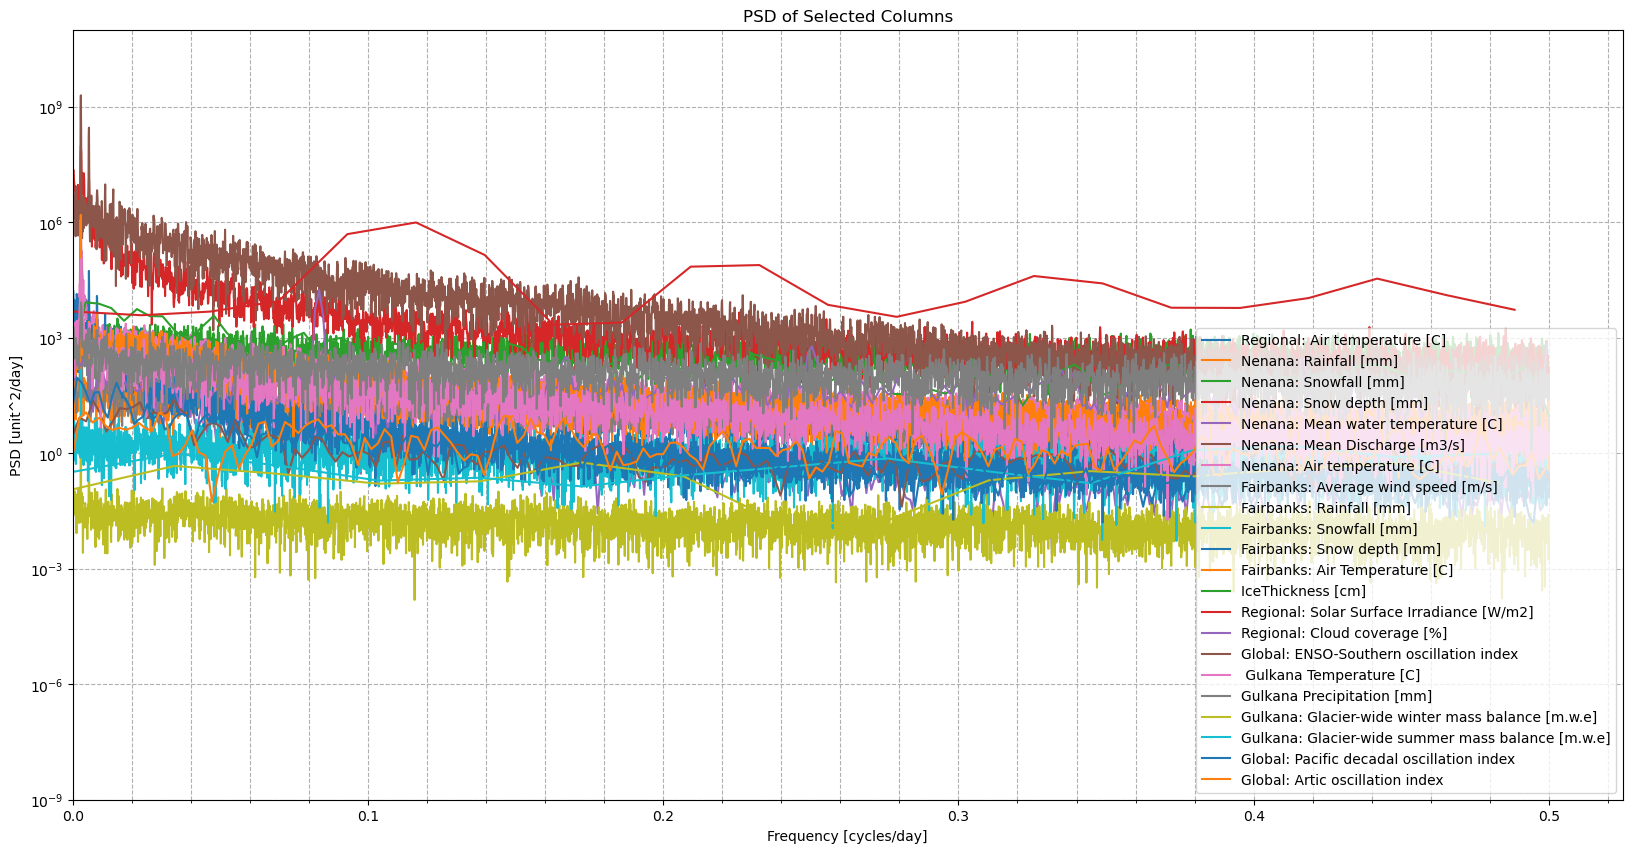

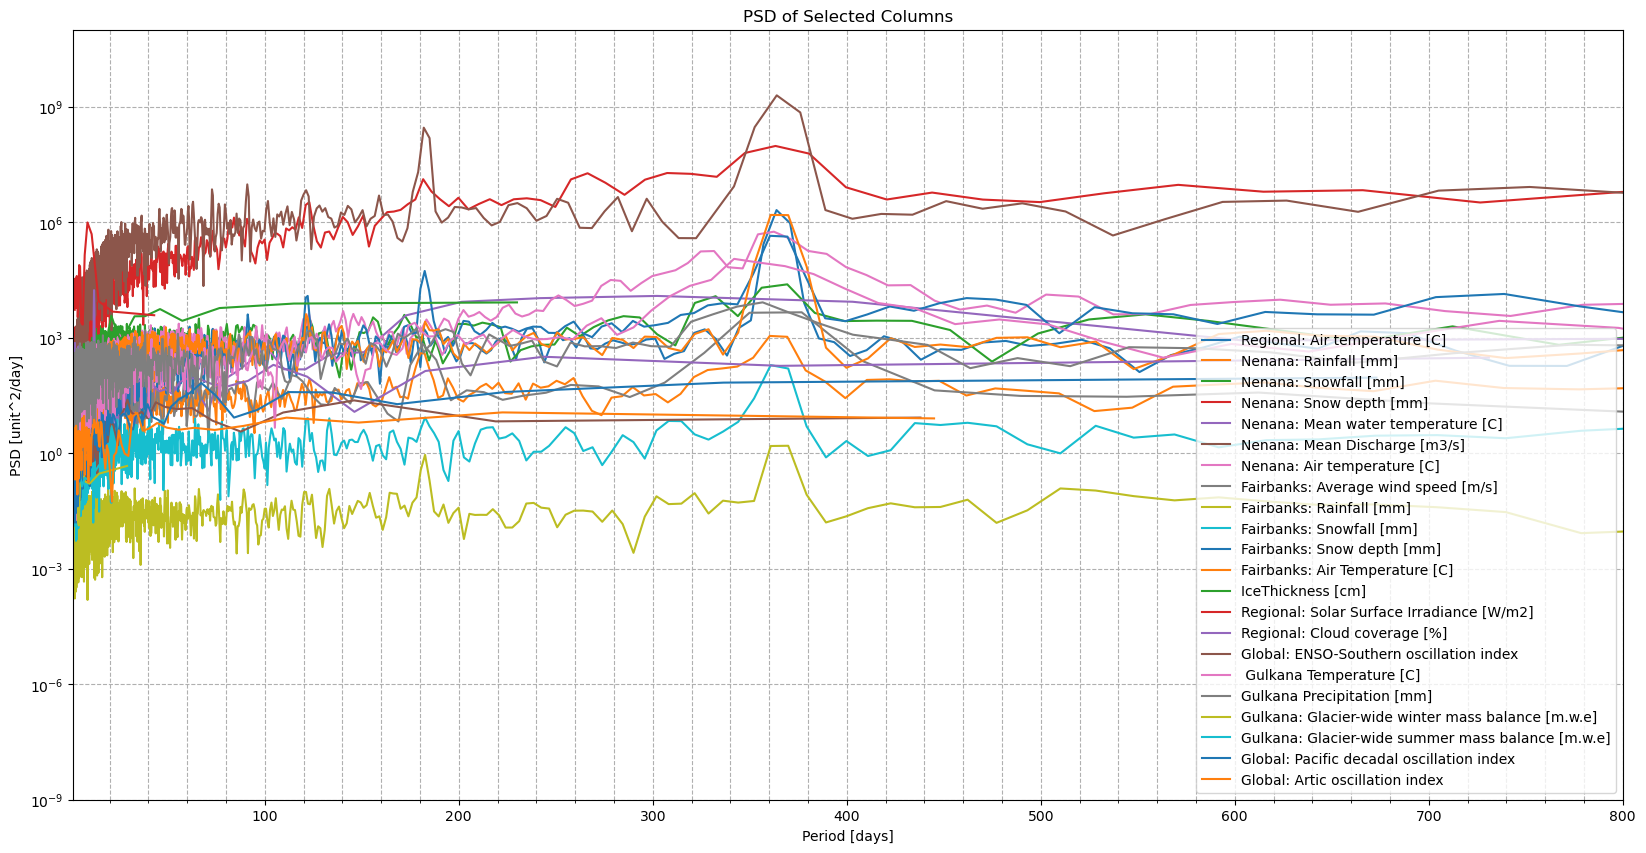

In [3]:
_=compute_and_plot_psd(Data,plot_period=False)	
PSD_info=compute_and_plot_psd(Data,plot_period=True,find_peaks_kwargs={"distance":100,"threshold":10})	

As you can see from last figure, there is peak corresponding to 350-370 days for most variables, as we expected as is represent the yearly variation. However, it is not exactly 365. One common way to identify the peak of PSD is to use `find_peaks`from  `scipy`. The function `compute_and_plot_psd` uses internally this function to find the peaks of each column, and saves them in a dictionary. 


::{card} Exercise 2
Extract the peak of each column and compare them.
```{admonition} Tips/Help
:class: tip, dropdown
Look-up the documentation of `[find_peaks]`(https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html). Considering what you expect the peak to look like, change the values of `prominence`, `distance` and or `threshold` to refine the search for peaks
```
:::



In [4]:
for col, psd_info in PSD_info.items():
    peak_periods =np.round(psd_info['peak_periods']).astype(int) 
    
    print(f"Column: {col}")
    print(f"Peak Periods: {peak_periods}\n")

Column: Regional: Air temperature [C]
Peak Periods: [371 123  61  43  33  27  22  19  17  15  14  13  12  11  10  10   9   9
   8   8   7   7   7   6   6   6   5   5   5   5   5   5   4   4]

Column: Nenana: Rainfall [mm]
Peak Periods: [369  76  49  36  27  22  19  16  14  13  11  10   9   9   8   8   7   6
   6   6   6   5   5   5   5   4   4   4   4   4   4   3   3   3   3   3
   3   3   3   3   3   2   2   2   2   2   2   2]

Column: Nenana: Snowfall [mm]
Peak Periods: [384  66  29  20  16  14  12  10   9   8   7   7   6   5   5   5   4   4
   4   4   4   3   3   3   3   3   3   3   3   3   3   2   2   2   2   2
   2   2]

Column: Nenana: Snow depth [mm]
Peak Periods: [381  65  36  22  16  11   9   8   7   7   6   5   5   4   4   4   3   3
   3   3   3   3   3   2   2   2   2   2   2   2]

Column: Nenana: Mean water temperature [C]
Peak Periods: [403]

Column: Nenana: Mean Discharge [m3/s]
Peak Periods: [376  73  37  26  19  16  13  11  10   9   8   8   7   6   6   6   5   5
   5   

We are getting better result, but we are still getting a lot of high frequency peaks(low period)
::{card} Exercise 3
Can you think about a reason why we are getting a lot of higher harmonics? Think back to the time-series, and consider `rainfall`, do we have data year-round? How does the flat/absence of data affect the PSD, consider essence of the FFT, how does it represent abrupt changes?
:::

Let apply a low-pass filter, that block higher frequencies and lets *low frequencies pass* and re-plot.

:::{card} Exercise 4
Use the same function as before, but consider the argument `apply_filter`, `max_allowed_freq`and `filter_order`
:::




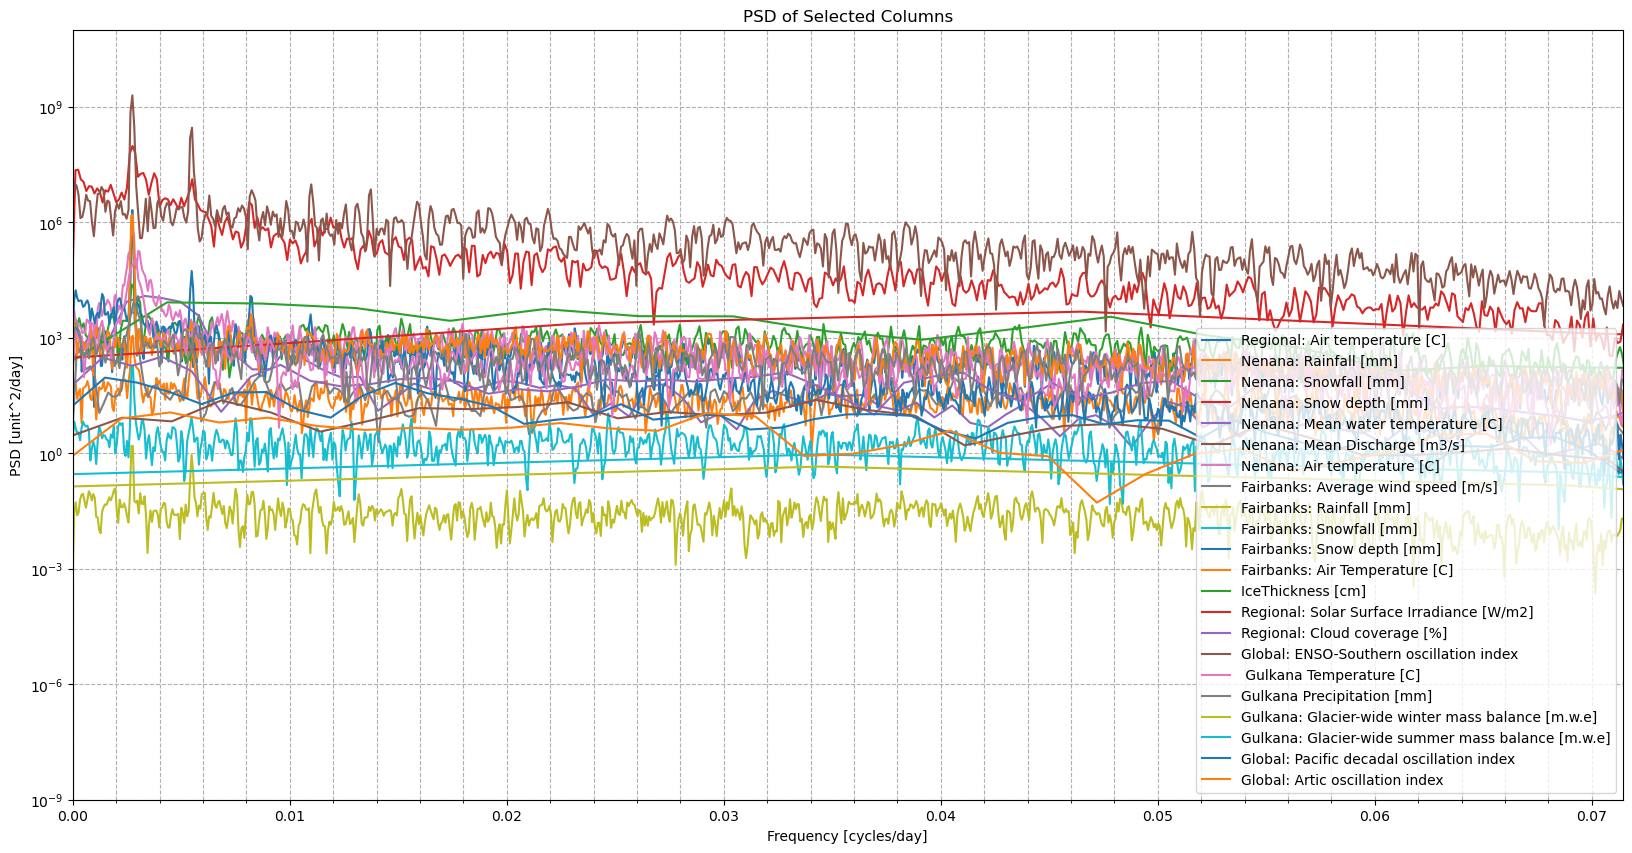

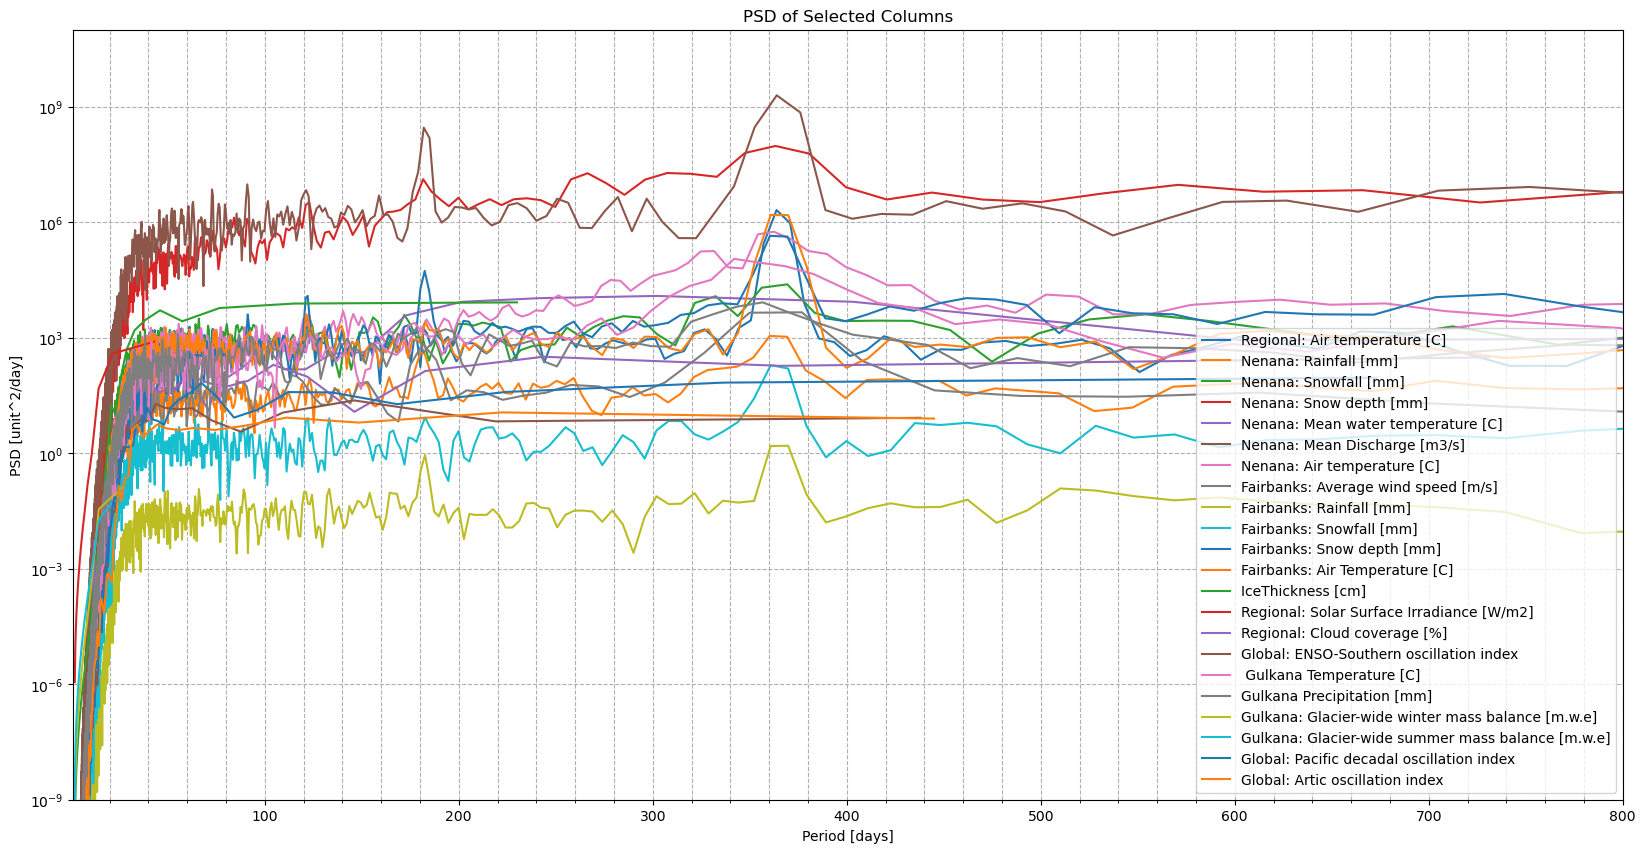

In [7]:
_=compute_and_plot_psd(Data,plot_period=False,find_peaks_kwargs={"distance":100,"threshold":10,"height":1e-2},apply_filter=True,max_allowed_freq=1/14,filter_order=4)
PSD_info=compute_and_plot_psd(Data,plot_period=True,find_peaks_kwargs={"distance":100,"threshold":10,"height":1e-2},apply_filter=True,max_allowed_freq=1/30,filter_order=4)

In [8]:
for col, psd_info in PSD_info.items():
    peak_periods =np.round(psd_info['peak_periods']).astype(int) 
    
    print(f"Column: {col}")
    print(f"Peak Periods: {peak_periods}\n")

Column: Regional: Air temperature [C]
Peak Periods: [371 123  61  43  34  28]

Column: Nenana: Rainfall [mm]
Peak Periods: [369  76  49  35]

Column: Nenana: Snowfall [mm]
Peak Periods: [384  66  38  27]

Column: Nenana: Snow depth [mm]
Peak Periods: [381  65  36  25]

Column: Nenana: Mean water temperature [C]
Peak Periods: [403]

Column: Nenana: Mean Discharge [m3/s]
Peak Periods: [376  73  37  26  21  17]

Column: Nenana: Air temperature [C]
Peak Periods: [371  99  56  41  32  26]

Column: Fairbanks: Average wind speed [m/s]
Peak Periods: [408  41]

Column: Fairbanks: Rainfall [mm]
Peak Periods: []

Column: Fairbanks: Snowfall [mm]
Peak Periods: [370]

Column: Fairbanks: Snow depth [mm]
Peak Periods: [369  92  52  36]

Column: Fairbanks: Air Temperature [C]
Peak Periods: [370  74  49  37  29]

Column: IceThickness [cm]
Peak Periods: [58]

Column: Regional: Solar Surface Irradiance [W/m2]
Peak Periods: []

Column: Regional: Cloud coverage [%]
Peak Periods: [366]

Column: Global: ENSO

> put here plot of historic seasonality+ harmonic identified


> create function for variables that are clearly piecewise `asymmetric`like ice/rain that, only happen in the winter, either use the `filter_df` function created previously or manage this (edge)case in a specific function

## is the seasonality really harmonic??
 >Fit a model(BLUE) but considering 1 harmonic, how does it differs from the PSD? Now using 4 harmonics, one for each season.

> What about the DC component ( how does this relate to linear trend)?


## If not harmonic then what?
if the seasonality is not harmonic ( mention that every finite (number) piecewise differentiable function can be expressed as sums of harmonics, but that not what we mean in this context) we have to propose a model, fit it using BLUE, and compute GOF

```
do that for:
    - quadratic
    - piecewise logistic
    - piecewise expo(norm)

```


